In [1]:
import pandas as pd
import sys

sys.path.append("../Handlers")

from traintest import get_nn_classification_models, ConvolutionalNNClassifier, RecurrentNNClassifier, ArtificialNNClassifier

In [2]:
enron1 = pd.read_csv("./csv/enron1.csv")
enron2 = pd.read_csv("./csv/enron2.csv")
enron3 = pd.read_csv("./csv/enron3.csv")
enron4 = pd.read_csv("./csv/enron4.csv")
enron5 = pd.read_csv("./csv/enron5.csv")
enron6 = pd.read_csv("./csv/enron6.csv")

In [3]:
subject = "Subject"
body = "Body"
enron1_input = enron1.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)
enron2_input = enron2.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)
enron3_input = enron3.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)
enron4_input = enron4.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)
enron5_input = enron5.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)
enron6_input = enron6.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)

In [4]:
metric_results = []

def train_and_evaluate_nn_models(
        enron_input, 
        enron_label, 
        enron_name, 
        test_size=0.1, 
        valid_size=0.1,
        cnn_dense_dropout=True,
        cnn_dense_dropout_rate=0.4,
        rnn_dense_dropout=True,
        rnn_dense_dropout_rate=0.4,
        epochs=20,
        conv_layer_num=2,
        cnn_num_filters:list=[128, 64],
        cnn_kernal_sizes:list=[5, 3],
        max_pooling=True,
        pooling_sizes=[2, 0],
        lstm=False,
        rnn_hidden_num=2,
        rnn_hidden_sizes=[128, 64],
        ann_hidden_num=2,
        ann_hidden_sizes=[64, 64]):
    models = get_nn_classification_models(enron_name)

    for model in models:
        print(f"Begin {model.__class__.__name__} on {enron_name}")

        model.load_data(enron_input, enron_label)
        model.split(test_size=test_size, valid_size=valid_size)
        model.vectorizing()

        if isinstance(model, ConvolutionalNNClassifier):
            model.build(
                dense_dropout=cnn_dense_dropout, 
                dense_dropout_rate=cnn_dense_dropout_rate, 
                epochs=epochs,
                conv_layer_num=conv_layer_num,
                num_filters=cnn_num_filters,
                kernel_sizes=cnn_kernal_sizes,
                max_pooling=max_pooling,
                pooling_sizes=pooling_sizes
            )

        elif isinstance(model, RecurrentNNClassifier):
            model.build(
                hidden_layer_num=rnn_hidden_num,
                hidden_sizes=rnn_hidden_sizes,
                epochs=epochs,
                lstm=lstm,
                dense_dropout=rnn_dense_dropout,
                dense_dropout_rate=rnn_dense_dropout_rate
            )

        elif isinstance(model, ArtificialNNClassifier):
            model.build(
                hidden_layer_num=ann_hidden_num,
                hidden_layer_sizes=ann_hidden_sizes,
                epochs=epochs
            )

        model.plot_training_validation_accuracy()
        metrics = model.evaluate()
        metric_results.append(metrics)

    del models

Begin ConvolutionalNNClassifier on enron1
[' christmas tree farm pictures\n nan'
 ' vastar resources , inc .\n gary , production from the high island larger block a - 1 # 2 commenced on\n\nsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and\n\n10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .\n\ngeorge x 3 - 6992\n\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16\n\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\n\ndaren j farmer\n\n12 / 10 / 99 10 : 38 am\n\nto : carlos j rodriguez / hou / ect @ ect\n\ncc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect\n\nsubject : vastar resources , inc .\n\ncarlos ,\n\nplease call linda and get everything set up .\n\ni \' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each\n\nfollowing day based on my conversations with bill fischer at bmar .\n\nd .\n\n- - - - - - - - - - - 

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 137ms/step - accuracy: 0.7771 - loss: 0.4368 - precision: 0.5960 - recall: 0.2940 - val_accuracy: 0.9653 - val_loss: 0.1164 - val_precision: 0.8951 - val_recall: 0.9932
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 149ms/step - accuracy: 0.9802 - loss: 0.0590 - precision: 0.9498 - recall: 0.9857 - val_accuracy: 0.9826 - val_loss: 0.0920 - val_precision: 0.9536 - val_recall: 0.9863
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.9973 - loss: 0.0123 - precision: 0.9932 - recall: 0.9976 - val_accuracy: 0.9807 - val_loss: 0.0832 - val_precision: 0.9474 - val_recall: 0.9863
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9982 - loss: 0.0081 - precision: 0.9965 - recall: 0.9973 - val_accuracy: 0.9710 - val_loss: 0.1078 - val_precision: 0.9456 - val_recall: 0.9521
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - accuracy: 0.9996 - loss: 0.0029 - precision: 0.9991 - recall: 0.9995 - val_accuracy: 0.9749

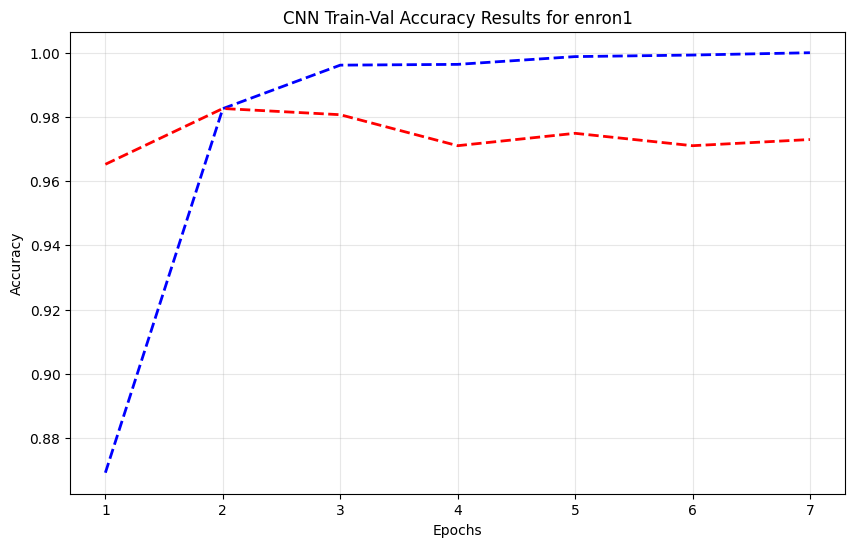

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
Begin RecurrentNNClassifier on enron1
[' christmas tree farm pictures\n nan'
 ' vastar resources , inc .\n gary , production from the high island larger block a - 1 # 2 commenced on\n\nsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and\n\n10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .\n\ngeorge x 3 - 6992\n\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16\n\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\n\ndaren j farmer\n\n12 / 10 / 99 10 : 38 am\n\nto : carlos j rodriguez / hou / ect @ ect\n\ncc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect\n\nsubject : vastar resources , inc .\n\ncarlos ,\n\nplease call linda and get everything set up .\n\ni \' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each\n\nfollowing day based on my conversations with bill fischer at bma

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


130/130 ━━━━━━━━━━━━━━━━━━━━ 113s 762ms/step - accuracy: 0.7102 - loss: 0.6164 - precision: 0.5515 - recall: 0.0711 - val_accuracy: 0.4035 - val_loss: 0.6992 - val_precision: 0.2968 - val_recall: 0.8151
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 56s 430ms/step - accuracy: 0.6884 - loss: 0.6029 - precision: 0.4248 - recall: 0.0564 - val_accuracy: 0.7432 - val_loss: 0.5634 - val_precision: 0.6970 - val_recall: 0.1575
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 26s 203ms/step - accuracy: 0.7786 - loss: 0.4414 - precision: 0.7971 - recall: 0.3535 - val_accuracy: 0.9614 - val_loss: 0.1242 - val_precision: 0.9200 - val_recall: 0.9452
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 28s 214ms/step - accuracy: 0.9733 - loss: 0.0855 - precision: 0.9386 - recall: 0.9732 - val_accuracy: 0.9691 - val_loss: 0.0965 - val_precision: 0.9392 - val_recall: 0.9521
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 189ms/step - accuracy: 0.9929 - loss: 0.0269 - precision: 0.9862 - recall: 0.9901 - val_accuracy: 0.9710 - val_los

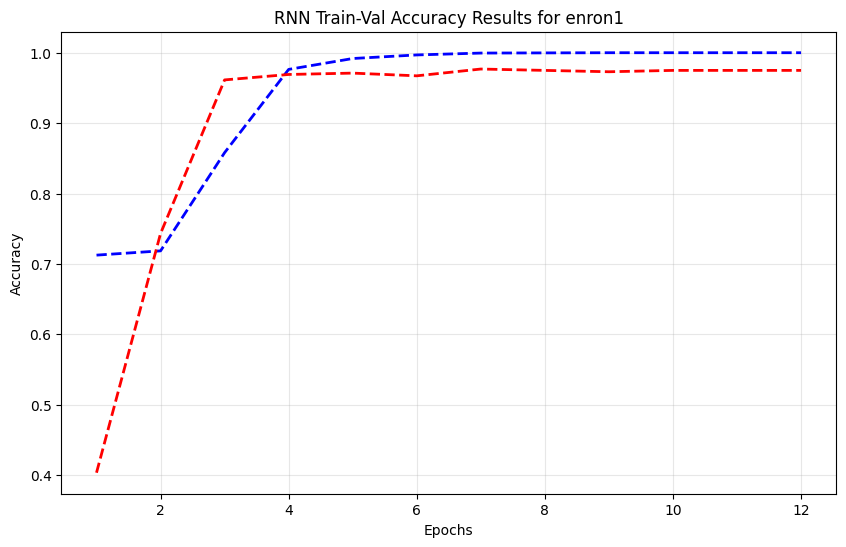

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
Begin ArtificialNNClassifier on enron1
[' christmas tree farm pictures\n nan'
 ' vastar resources , inc .\n gary , production from the high island larger block a - 1 # 2 commenced on\n\nsaturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and\n\n10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .\n\ngeorge x 3 - 6992\n\n- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16\n\nam - - - - - - - - - - - - - - - - - - - - - - - - - - -\n\ndaren j farmer\n\n12 / 10 / 99 10 : 38 am\n\nto : carlos j rodriguez / hou / ect @ ect\n\ncc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect\n\nsubject : vastar resources , inc .\n\ncarlos ,\n\nplease call linda and get everything set up .\n\ni \' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each\n\nfollowing day based on my conversations with bill fischer at bm

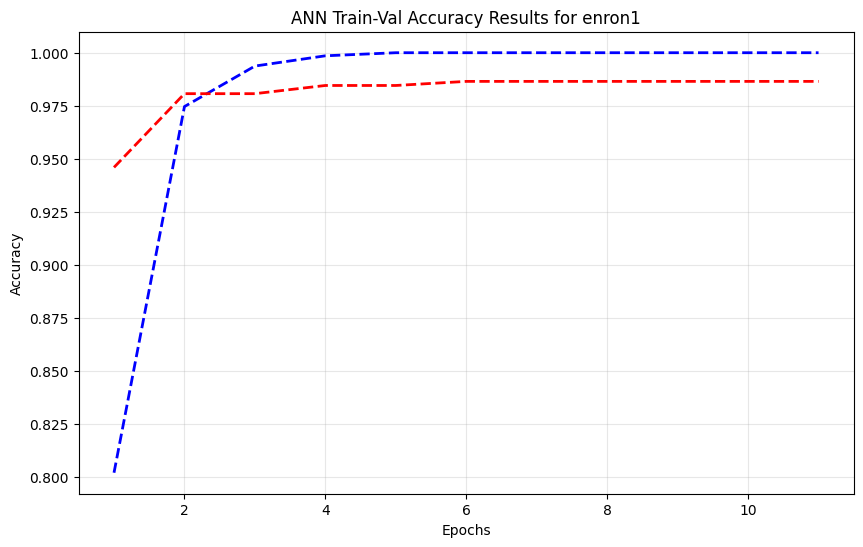

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [5]:
train_and_evaluate_nn_models(enron1_input, enron1["Label"], "enron1")

Begin ConvolutionalNNClassifier on enron2
[' re : rankings\n thank you .'
 ' re : visit to enron\n vince ,\n\ndec . 29 at 9 : 00 will be fine . i have talked to shirley and have\n\ndirections .\n\nthanks , bob\n\nvince j kaminski wrote :\n\n> bob ,\n\n>\n\n> can you come to our office on dec 29 at 9 : 00 a . m . ?\n\n>\n\n> please , call shirley crenshaw ( 3 - 5290 ) or stinson gibner ( 3 - 4748 )\n\n> from the reception to be admitted to the building .\n\n>\n\n> vince kaminski'
 ' research group move to the 19 th floor\n hello all :\n\nin case any of you feel energetic , " the boxes are here " . they are located\n\nat 2963 b ( michael sergeev \' s old desk ) . feel free to take as many as\n\nyou will need . be sure to label everything with your new office location .\n\nif your file cabinets lock , you can just label them and lock them .\n\nagain , listed below is your new office location :\n\nstinson gibner eb 1936\n\njoseph hrgovcic eb 1947\n\npaulo issler eb 1935\n\nvince kaminski e

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.8050 - loss: 0.3902 - precision: 0.6343 - recall: 0.2822 - val_accuracy: 0.9761 - val_loss: 0.0785 - val_precision: 0.9427 - val_recall: 0.9673
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9870 - loss: 0.0531 - precision: 0.9667 - recall: 0.9819 - val_accuracy: 0.9812 - val_loss: 0.0505 - val_precision: 0.9494 - val_recall: 0.9804
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9955 - loss: 0.0166 - precision: 0.9921 - recall: 0.9908 - val_accuracy: 0.9863 - val_loss: 0.0423 - val_precision: 0.9560 - val_recall: 0.9935
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9990 - loss: 0.0056 - precision: 0.9983 - recall: 0.9979 - val_accuracy: 0.9863 - val_loss: 0.0515 - val_precision: 0.9677 - val_recall: 0.9804
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 1.0000 - loss: 0.0012 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9863 - val_loss: 0.0450 -

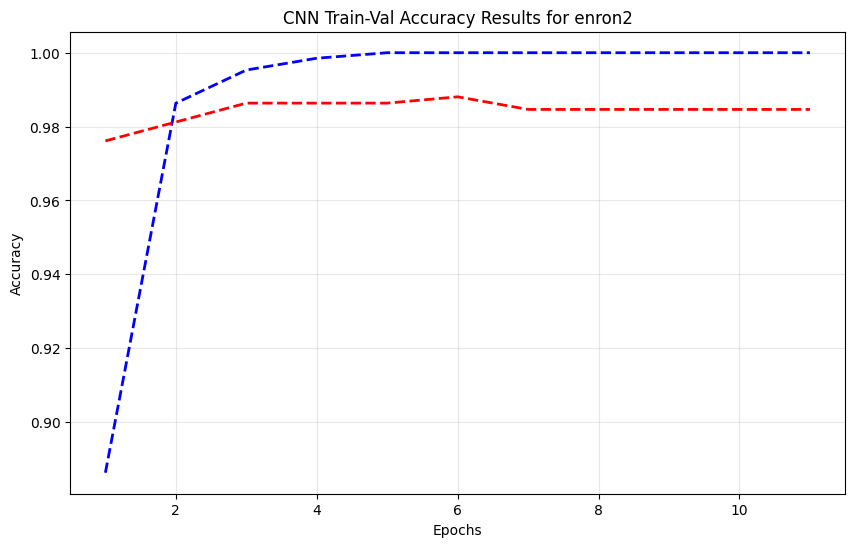

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Begin RecurrentNNClassifier on enron2
[' re : rankings\n thank you .'
 ' re : visit to enron\n vince ,\n\ndec . 29 at 9 : 00 will be fine . i have talked to shirley and have\n\ndirections .\n\nthanks , bob\n\nvince j kaminski wrote :\n\n> bob ,\n\n>\n\n> can you come to our office on dec 29 at 9 : 00 a . m . ?\n\n>\n\n> please , call shirley crenshaw ( 3 - 5290 ) or stinson gibner ( 3 - 4748 )\n\n> from the reception to be admitted to the building .\n\n>\n\n> vince kaminski'
 ' research group move to the 19 th floor\n hello all :\n\nin case any of you feel energetic , " the boxes are here " . they are located\n\nat 2963 b ( michael sergeev \' s old desk ) . feel free to take as many as\n\nyou will need . be sure to label everything with your new office location .\n\nif your file cabinets lock , you can just label them and lock them .\n\nagain , listed below is your new office location :\n\nstinson gibner eb 1936\n\njoseph hrgovcic eb 1947\n\npaul

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


147/147 ━━━━━━━━━━━━━━━━━━━━ 30s 179ms/step - accuracy: 0.7212 - loss: 0.5931 - precision: 0.2578 - recall: 0.0464 - val_accuracy: 0.7406 - val_loss: 0.5141 - val_precision: 0.5455 - val_recall: 0.0392
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.7540 - loss: 0.5057 - precision: 0.5732 - recall: 0.1603 - val_accuracy: 0.7611 - val_loss: 0.5143 - val_precision: 0.8421 - val_recall: 0.1046
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.8362 - loss: 0.3800 - precision: 0.9087 - recall: 0.4304 - val_accuracy: 0.9505 - val_loss: 0.1352 - val_precision: 0.9189 - val_recall: 0.8889
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 26s 178ms/step - accuracy: 0.9666 - loss: 0.1001 - precision: 0.9450 - recall: 0.9260 - val_accuracy: 0.9727 - val_loss: 0.0823 - val_precision: 0.9363 - val_recall: 0.9608
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 27s 186ms/step - accuracy: 0.9862 - loss: 0.0571 - precision: 0.9725 - recall: 0.9749 - val_accuracy: 0.9778 - val_loss

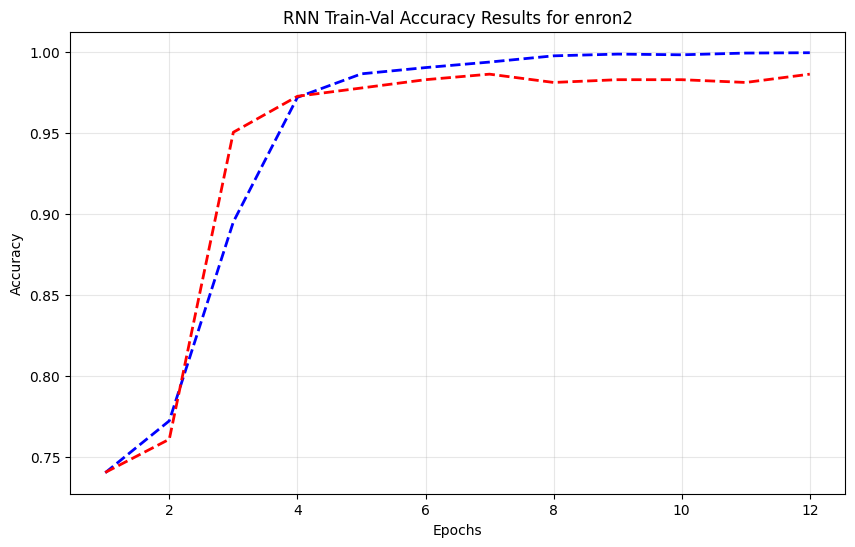

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step
Begin ArtificialNNClassifier on enron2
[' re : rankings\n thank you .'
 ' re : visit to enron\n vince ,\n\ndec . 29 at 9 : 00 will be fine . i have talked to shirley and have\n\ndirections .\n\nthanks , bob\n\nvince j kaminski wrote :\n\n> bob ,\n\n>\n\n> can you come to our office on dec 29 at 9 : 00 a . m . ?\n\n>\n\n> please , call shirley crenshaw ( 3 - 5290 ) or stinson gibner ( 3 - 4748 )\n\n> from the reception to be admitted to the building .\n\n>\n\n> vince kaminski'
 ' research group move to the 19 th floor\n hello all :\n\nin case any of you feel energetic , " the boxes are here " . they are located\n\nat 2963 b ( michael sergeev \' s old desk ) . feel free to take as many as\n\nyou will need . be sure to label everything with your new office location .\n\nif your file cabinets lock , you can just label them and lock them .\n\nagain , listed below is your new office location :\n\nstinson gibner eb 1936\n\njoseph hrgovcic eb 1947\n\npau

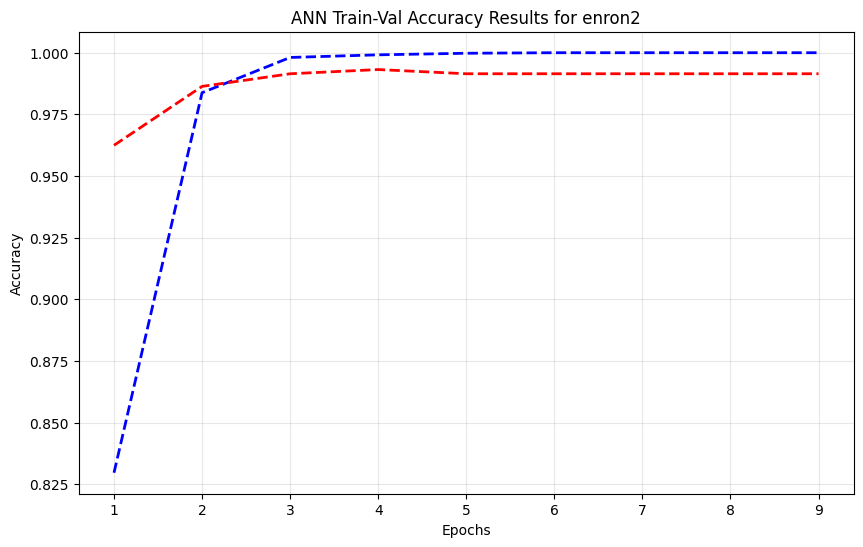

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [6]:
train_and_evaluate_nn_models(enron2_input, enron2["Label"], "enron2")

Begin ConvolutionalNNClassifier on enron3
[' key hr issues going forward\n a ) year end reviews - report needs generating like mid - year documenting business unit performance on review completion - david to john ;\n\nb ) work out or plan generation for the nim / issues employees - david to john ;\n\nc ) hpl transition issues - ongoing .\n\nofficially transferred .\n\nregards\n\ndelainey'
 ' congrats !\n contratulations on the execution of the central maine sos deal ! this is another great example of what we can do when everyone comes together to get something done . this transaction brings both strategic value to the business , nice positions for the book and quite a nice chunk of change as well !\n\ngreat job guys !\n\n( hey dana , are you paying for the celebration dinner ? ! )'
 ' re : key hr issues going forward\n all is under control :\n\na - we \' ve set up a " work - out " group under cindy skinner and will be producing the stats and making sure we don \' t cop out .\n\nb - as 

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.7867 - loss: 0.4206 - precision: 0.6275 - recall: 0.3294 - val_accuracy: 0.9764 - val_loss: 0.0605 - val_precision: 0.9767 - val_recall: 0.9265
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9866 - loss: 0.0432 - precision: 0.9666 - recall: 0.9847 - val_accuracy: 0.9837 - val_loss: 0.0473 - val_precision: 0.9568 - val_recall: 0.9779
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9967 - loss: 0.0094 - precision: 0.9942 - recall: 0.9939 - val_accuracy: 0.9855 - val_loss: 0.0517 - val_precision: 0.9706 - val_recall: 0.9706
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9993 - loss: 0.0022 - precision: 0.9992 - recall: 0.9982 - val_accuracy: 0.9855 - val_loss: 0.0547 - val_precision: 0.9638 - val_recall: 0.9779
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9992 - loss: 0.0015 - precision: 1.0000 - recall: 0.9971 - val_accuracy: 0.9873 - val_loss: 0.0637 -

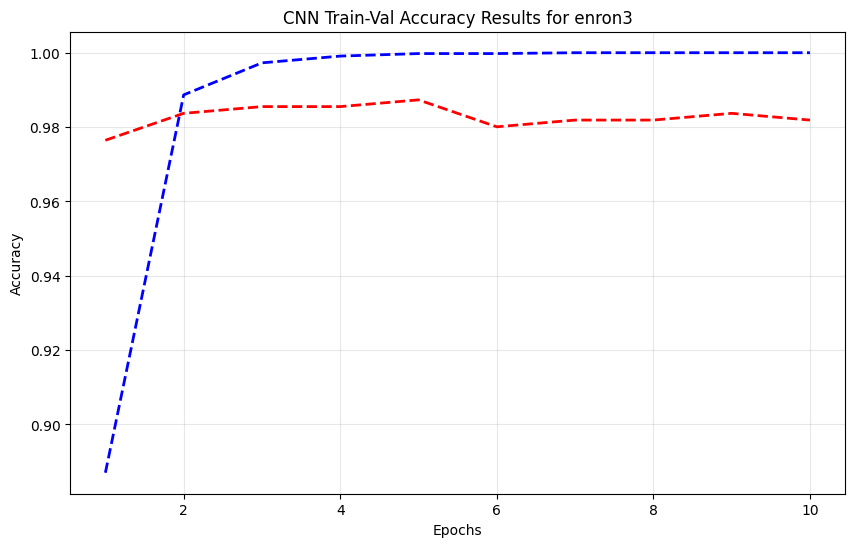

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Begin RecurrentNNClassifier on enron3
[' key hr issues going forward\n a ) year end reviews - report needs generating like mid - year documenting business unit performance on review completion - david to john ;\n\nb ) work out or plan generation for the nim / issues employees - david to john ;\n\nc ) hpl transition issues - ongoing .\n\nofficially transferred .\n\nregards\n\ndelainey'
 ' congrats !\n contratulations on the execution of the central maine sos deal ! this is another great example of what we can do when everyone comes together to get something done . this transaction brings both strategic value to the business , nice positions for the book and quite a nice chunk of change as well !\n\ngreat job guys !\n\n( hey dana , are you paying for the celebration dinner ? ! )'
 ' re : key hr issues going forward\n all is under control :\n\na - we \' ve set up a " work - out " group under cindy skinner and will be producing the stats and making s

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


138/138 ━━━━━━━━━━━━━━━━━━━━ 31s 203ms/step - accuracy: 0.7126 - loss: 0.6163 - precision: 0.2722 - recall: 0.0344 - val_accuracy: 0.7645 - val_loss: 0.7989 - val_precision: 0.8750 - val_recall: 0.0515
Epoch 2/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 29s 211ms/step - accuracy: 0.7477 - loss: 0.5524 - precision: 0.6927 - recall: 0.1818 - val_accuracy: 0.8043 - val_loss: 0.4075 - val_precision: 0.9118 - val_recall: 0.2279
Epoch 3/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 26s 186ms/step - accuracy: 0.8831 - loss: 0.2352 - precision: 0.9266 - recall: 0.6388 - val_accuracy: 0.9928 - val_loss: 0.0333 - val_precision: 0.9853 - val_recall: 0.9853
Epoch 4/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 28s 201ms/step - accuracy: 0.9880 - loss: 0.0433 - precision: 0.9743 - recall: 0.9823 - val_accuracy: 0.9928 - val_loss: 0.0298 - val_precision: 0.9714 - val_recall: 1.0000
Epoch 5/20
138/138 ━━━━━━━━━━━━━━━━━━━━ 28s 201ms/step - accuracy: 0.9966 - loss: 0.0148 - precision: 0.9935 - recall: 0.9941 - val_accuracy: 0.9855 - val_loss

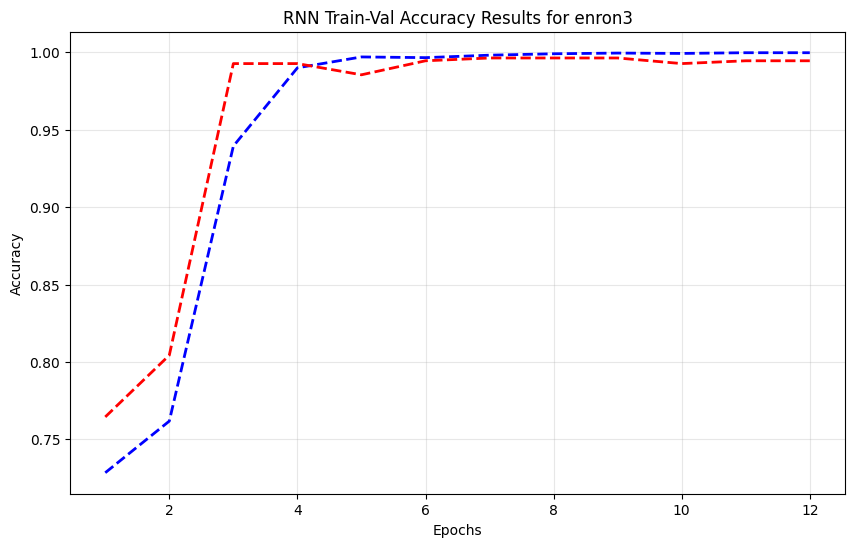

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Begin ArtificialNNClassifier on enron3
[' key hr issues going forward\n a ) year end reviews - report needs generating like mid - year documenting business unit performance on review completion - david to john ;\n\nb ) work out or plan generation for the nim / issues employees - david to john ;\n\nc ) hpl transition issues - ongoing .\n\nofficially transferred .\n\nregards\n\ndelainey'
 ' congrats !\n contratulations on the execution of the central maine sos deal ! this is another great example of what we can do when everyone comes together to get something done . this transaction brings both strategic value to the business , nice positions for the book and quite a nice chunk of change as well !\n\ngreat job guys !\n\n( hey dana , are you paying for the celebration dinner ? ! )'
 ' re : key hr issues going forward\n all is under control :\n\na - we \' ve set up a " work - out " group under cindy skinner and will be producing the stats and making 

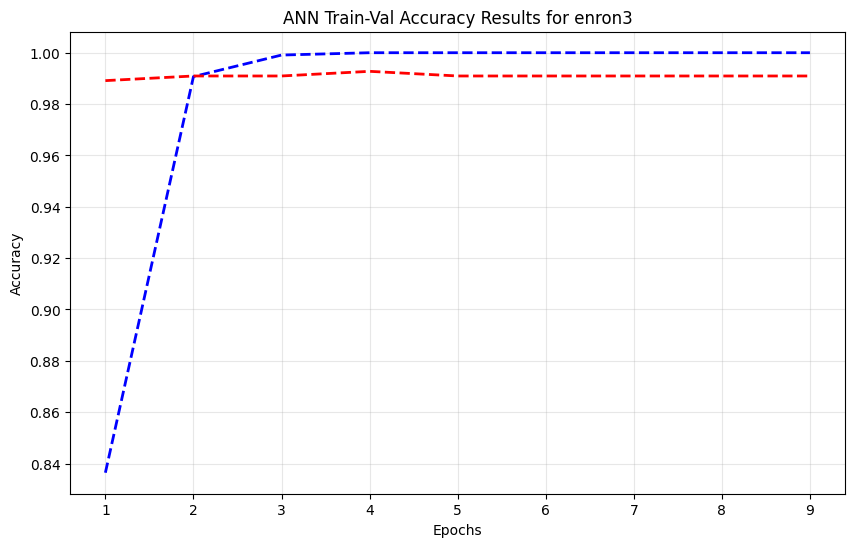

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [7]:
train_and_evaluate_nn_models(enron3_input, enron3["Label"], "enron3")

Begin ConvolutionalNNClassifier on enron4
[" re : quasi\n good morning ,\n\ni ' d love to go get some coffee with you , but remember that annoying project that mike etringer wants me to work on for him ? this morning i am kinda under some pressure to hurry up and try to get some stuff figured out so i really don ' t have much spare time right now . ja would flip out if i left for coffee now . maybe later this afternoon ? or tomorrow morning ? anyhow , another ride sounds really cool . i had lots of fun . and yes , it would be cooler if i didn ' t have to worry about work . let me know when you have extra time to go for a ride .\n\nmy weekend was pretty fun . i weed - wacked ( is that a word ? ) my yard for the first time . it looks so bad . i so don ' t know anything about lawn care . also i planted some herbs and stuff in my yard which i am sure my dog will destroy , but it s worth a try . oh yeah , i also bought a snowboard . it ' s pretty cool . i bought some step - in switch boots 

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8516 - loss: 0.3775 - precision: 0.8433 - recall: 0.9933 - val_accuracy: 0.9850 - val_loss: 0.0355 - val_precision: 0.9850 - val_recall: 0.9957
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9888 - loss: 0.0336 - precision: 0.9889 - recall: 0.9961 - val_accuracy: 0.9833 - val_loss: 0.0504 - val_precision: 0.9788 - val_recall: 1.0000
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9968 - loss: 0.0088 - precision: 0.9961 - recall: 0.9996 - val_accuracy: 0.9917 - val_loss: 0.0268 - val_precision: 0.9893 - val_recall: 1.0000
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 1.0000 - loss: 6.8677e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9950 - val_loss: 0.0190 - val_precision: 0.9935 - val_recall: 1.0000
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 1.0000 - loss: 5.1251e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9917 - val_loss: 

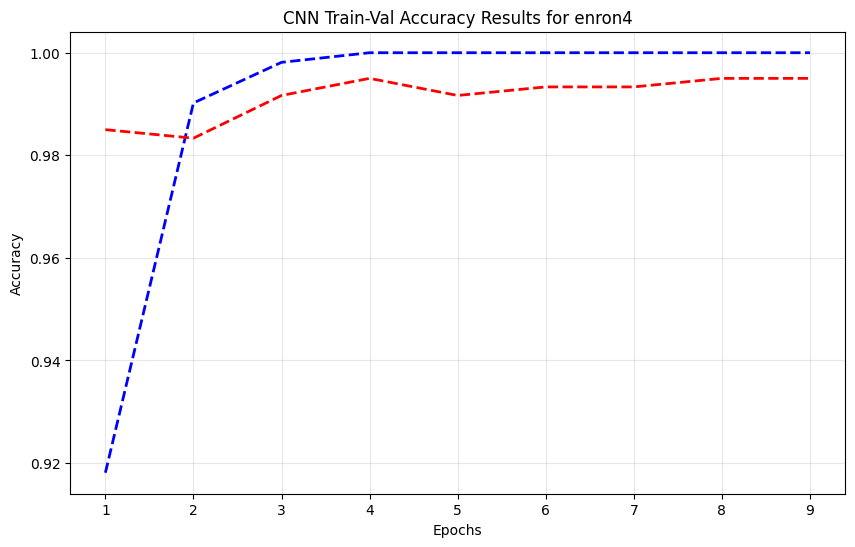

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Begin RecurrentNNClassifier on enron4
[" re : quasi\n good morning ,\n\ni ' d love to go get some coffee with you , but remember that annoying project that mike etringer wants me to work on for him ? this morning i am kinda under some pressure to hurry up and try to get some stuff figured out so i really don ' t have much spare time right now . ja would flip out if i left for coffee now . maybe later this afternoon ? or tomorrow morning ? anyhow , another ride sounds really cool . i had lots of fun . and yes , it would be cooler if i didn ' t have to worry about work . let me know when you have extra time to go for a ride .\n\nmy weekend was pretty fun . i weed - wacked ( is that a word ? ) my yard for the first time . it looks so bad . i so don ' t know anything about lawn care . also i planted some herbs and stuff in my yard which i am sure my dog will destroy , but it s worth a try . oh yeah , i also bought a snowboard . it ' s pretty cool . i

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 210ms/step - accuracy: 0.7405 - loss: 0.5884 - precision: 0.7454 - recall: 0.9842 - val_accuracy: 0.7883 - val_loss: 0.5295 - val_precision: 0.7844 - val_recall: 1.0000
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 208ms/step - accuracy: 0.8659 - loss: 0.4019 - precision: 0.8609 - recall: 0.9859 - val_accuracy: 0.9517 - val_loss: 0.2013 - val_precision: 0.9501 - val_recall: 0.9892
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 32s 210ms/step - accuracy: 0.9484 - loss: 0.2024 - precision: 0.9705 - recall: 0.9606 - val_accuracy: 0.8533 - val_loss: 0.3668 - val_precision: 0.9845 - val_recall: 0.8225
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 208ms/step - accuracy: 0.8951 - loss: 0.2566 - precision: 0.9373 - recall: 0.9202 - val_accuracy: 0.9317 - val_loss: 0.2486 - val_precision: 0.9185 - val_recall: 1.0000
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 206ms/step - accuracy: 0.9730 - loss: 0.1192 - precision: 0.9663 - recall: 0.9987 - val_accuracy: 0.9767 - val_loss

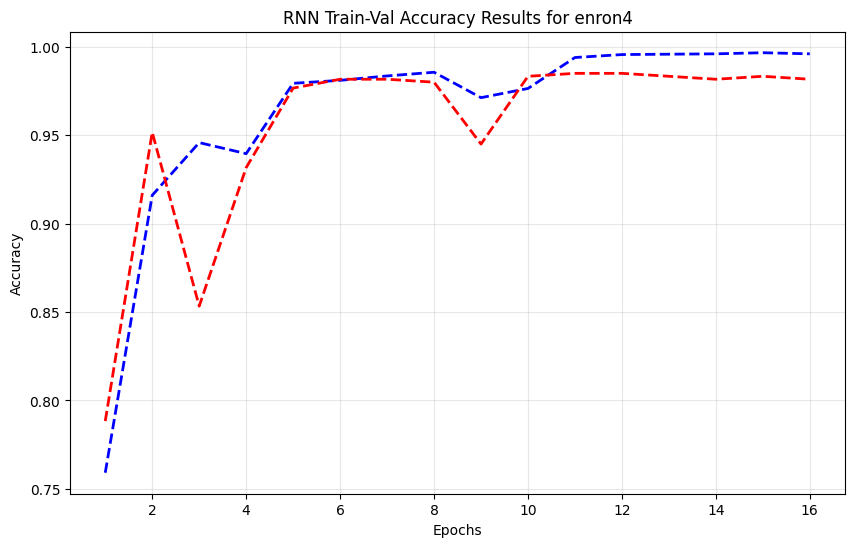

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step
Begin ArtificialNNClassifier on enron4
[" re : quasi\n good morning ,\n\ni ' d love to go get some coffee with you , but remember that annoying project that mike etringer wants me to work on for him ? this morning i am kinda under some pressure to hurry up and try to get some stuff figured out so i really don ' t have much spare time right now . ja would flip out if i left for coffee now . maybe later this afternoon ? or tomorrow morning ? anyhow , another ride sounds really cool . i had lots of fun . and yes , it would be cooler if i didn ' t have to worry about work . let me know when you have extra time to go for a ride .\n\nmy weekend was pretty fun . i weed - wacked ( is that a word ? ) my yard for the first time . it looks so bad . i so don ' t know anything about lawn care . also i planted some herbs and stuff in my yard which i am sure my dog will destroy , but it s worth a try . oh yeah , i also bought a snowboard . it ' s pretty cool . 

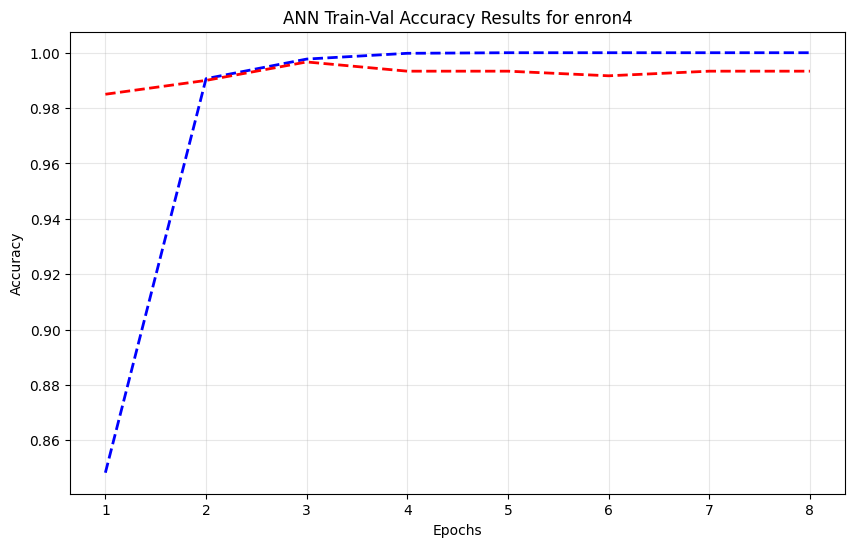

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [8]:
train_and_evaluate_nn_models(enron4_input, enron4["Label"], "enron4")

Begin ConvolutionalNNClassifier on enron5
[' leadership development pilot\n sally :\n\nwhat timing , ask and you shall receive . as per our discussion , listed below\n\nis an update on the leadership pilot . your vendor selection team will\n\nreceive an update and even more information later in the week .\n\non the lunch & learn for energy operations , the audience and focus will be\n\nyour group . we are ready to start up when appropriate .\n\nthank you for your time today . please call me if you have any questions at\n\nx 33597 .\n\n- - - - - - - - - - - - - - - - - - - - - - forwarded by julie armstrong / corp / enron on 01 / 17 / 2000\n\n06 : 44 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\n\nfrom : susan runkel @ ect 01 / 17 / 2000 03 : 22 pm\n\nto : cindy skinner / hou / ect @ ect , brad mcsherry / hou / ect @ ect , norma\n\nvillarreal / hou / ect @ ect , kimberly rizzi / hou / ect @ ect , fran l mayes / hou / ect @ ect ,\n\ngary buck / hou / ect @ ect , robert jones 

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.7465 - loss: 0.5151 - precision: 0.7435 - recall: 0.9871 - val_accuracy: 0.9923 - val_loss: 0.0273 - val_precision: 0.9947 - val_recall: 0.9947
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9909 - loss: 0.0260 - precision: 0.9936 - recall: 0.9936 - val_accuracy: 0.9903 - val_loss: 0.0277 - val_precision: 0.9973 - val_recall: 0.9893
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9986 - loss: 0.0056 - precision: 0.9997 - recall: 0.9983 - val_accuracy: 0.9942 - val_loss: 0.0180 - val_precision: 0.9920 - val_recall: 1.0000
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9998 - loss: 0.0015 - precision: 1.0000 - recall: 0.9997 - val_accuracy: 0.9942 - val_loss: 0.0164 - val_precision: 0.9947 - val_recall: 0.9973
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9996 - loss: 8.9532e-04 - precision: 1.0000 - recall: 0.9994 - val_accuracy: 0.9961 - val

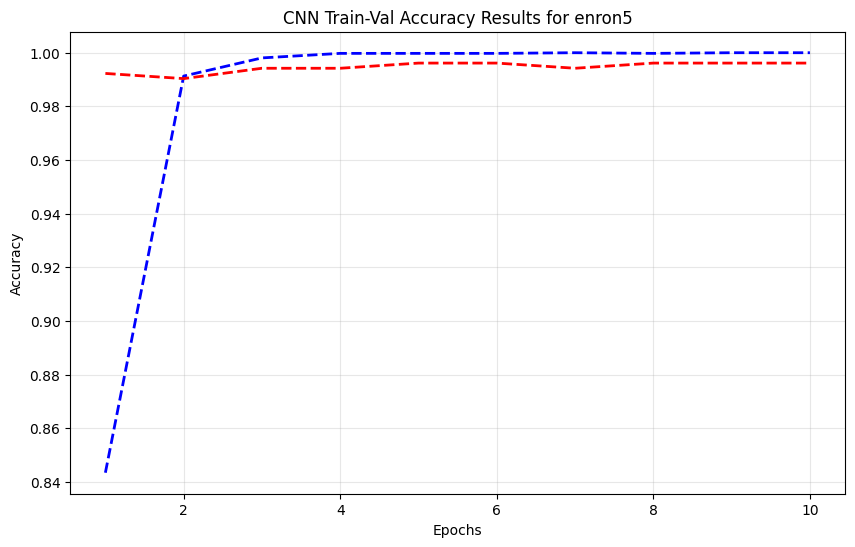

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Begin RecurrentNNClassifier on enron5
[' leadership development pilot\n sally :\n\nwhat timing , ask and you shall receive . as per our discussion , listed below\n\nis an update on the leadership pilot . your vendor selection team will\n\nreceive an update and even more information later in the week .\n\non the lunch & learn for energy operations , the audience and focus will be\n\nyour group . we are ready to start up when appropriate .\n\nthank you for your time today . please call me if you have any questions at\n\nx 33597 .\n\n- - - - - - - - - - - - - - - - - - - - - - forwarded by julie armstrong / corp / enron on 01 / 17 / 2000\n\n06 : 44 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\n\nfrom : susan runkel @ ect 01 / 17 / 2000 03 : 22 pm\n\nto : cindy skinner / hou / ect @ ect , brad mcsherry / hou / ect @ ect , norma\n\nvillarreal / hou / ect @ ect , kimberly rizzi / hou / ect @ ect , fran l mayes / hou / ect @ ect ,\n\ngary bu

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


130/130 ━━━━━━━━━━━━━━━━━━━━ 33s 211ms/step - accuracy: 0.7006 - loss: 0.6073 - precision: 0.7136 - recall: 0.9577 - val_accuracy: 0.8977 - val_loss: 0.3181 - val_precision: 0.8794 - val_recall: 0.9947
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 181ms/step - accuracy: 0.8923 - loss: 0.3241 - precision: 0.9183 - recall: 0.9278 - val_accuracy: 0.9228 - val_loss: 0.2731 - val_precision: 0.9260 - val_recall: 0.9706
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 28s 213ms/step - accuracy: 0.9333 - loss: 0.2510 - precision: 0.9418 - recall: 0.9657 - val_accuracy: 0.8629 - val_loss: 0.3679 - val_precision: 0.9292 - val_recall: 0.8770
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 192ms/step - accuracy: 0.8485 - loss: 0.3480 - precision: 0.9466 - recall: 0.8304 - val_accuracy: 0.9344 - val_loss: 0.2411 - val_precision: 0.9359 - val_recall: 0.9759
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 181ms/step - accuracy: 0.9043 - loss: 0.2868 - precision: 0.9096 - recall: 0.9619 - val_accuracy: 0.9768 - val_loss

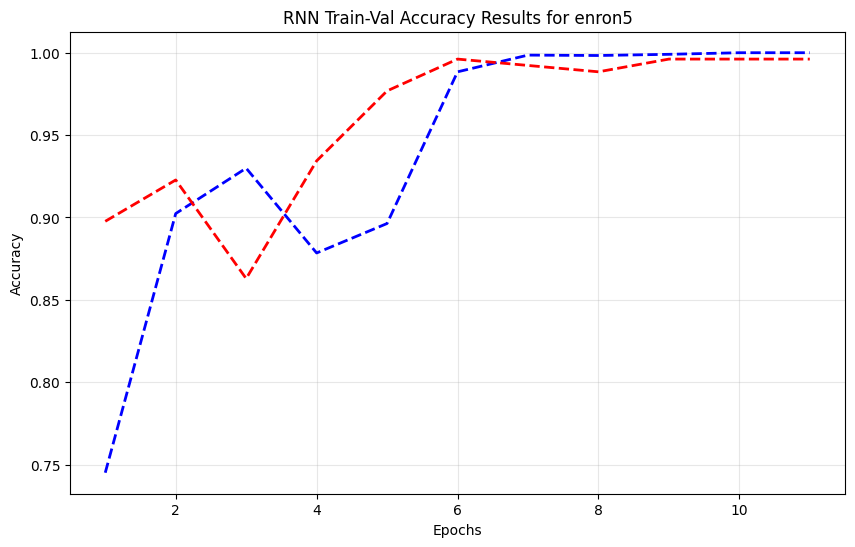

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Begin ArtificialNNClassifier on enron5
[' leadership development pilot\n sally :\n\nwhat timing , ask and you shall receive . as per our discussion , listed below\n\nis an update on the leadership pilot . your vendor selection team will\n\nreceive an update and even more information later in the week .\n\non the lunch & learn for energy operations , the audience and focus will be\n\nyour group . we are ready to start up when appropriate .\n\nthank you for your time today . please call me if you have any questions at\n\nx 33597 .\n\n- - - - - - - - - - - - - - - - - - - - - - forwarded by julie armstrong / corp / enron on 01 / 17 / 2000\n\n06 : 44 pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\n\nfrom : susan runkel @ ect 01 / 17 / 2000 03 : 22 pm\n\nto : cindy skinner / hou / ect @ ect , brad mcsherry / hou / ect @ ect , norma\n\nvillarreal / hou / ect @ ect , kimberly rizzi / hou / ect @ ect , fran l mayes / hou / ect @ ect ,\n\ngary b

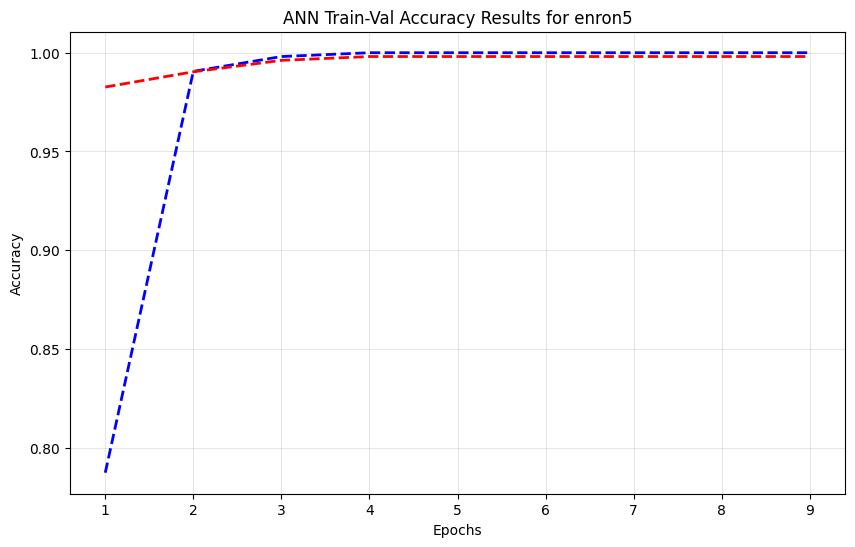

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [9]:
train_and_evaluate_nn_models(enron5_input, enron5["Label"], "enron5")

Begin ConvolutionalNNClassifier on enron6
[" key dates and impact of upcoming sap implementation\n over the next few weeks , project apollo and beyond will conduct its final sap\n\nimplementation \x01 ) this implementation will impact approximately 12 , 000 new\n\nusers plus all existing system users . sap brings a new dynamic to enron ,\n\nenhancing the timely flow and sharing of specific project , human resources ,\n\nprocurement , and financial information across business units and across\n\ncontinents .\n\nthis final implementation will retire multiple , disparate systems and replace\n\nthem with a common , integrated system encompassing many processes including\n\npayroll , timekeeping , benefits , project management , and numerous financial\n\nprocesses .\n\nemployees will be empowered to update and / or view their personal information\n\nvia the intranet - based ehronline - - a single front - end to sap ' s self service\n\nfunctionality and enron ' s global information system ( 

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.7923 - loss: 0.4664 - precision: 0.7922 - recall: 0.9871 - val_accuracy: 0.9683 - val_loss: 0.0920 - val_precision: 0.9840 - val_recall: 0.9729
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9857 - loss: 0.0422 - precision: 0.9881 - recall: 0.9930 - val_accuracy: 0.9817 - val_loss: 0.0602 - val_precision: 0.9779 - val_recall: 0.9977
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9970 - loss: 0.0093 - precision: 0.9969 - recall: 0.9992 - val_accuracy: 0.9800 - val_loss: 0.0703 - val_precision: 0.9757 - val_recall: 0.9977
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9997 - loss: 0.0015 - precision: 0.9995 - recall: 1.0000 - val_accuracy: 0.9783 - val_loss: 0.1204 - val_precision: 0.9715 - val_recall: 1.0000
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9997 - loss: 0.0013 - precision: 0.9996 - recall: 1.0000 - val_accuracy: 0.9850 - val_loss: 0.1058 -

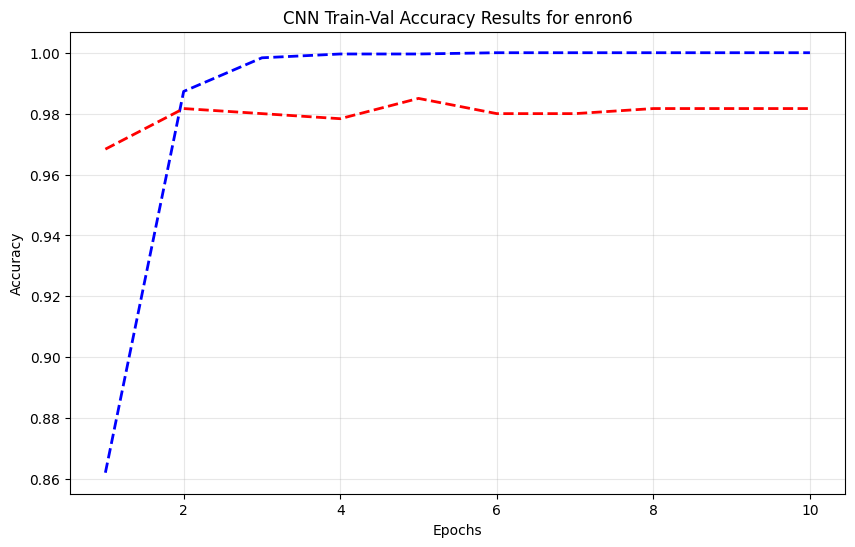

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Begin RecurrentNNClassifier on enron6
[" key dates and impact of upcoming sap implementation\n over the next few weeks , project apollo and beyond will conduct its final sap\n\nimplementation \x01 ) this implementation will impact approximately 12 , 000 new\n\nusers plus all existing system users . sap brings a new dynamic to enron ,\n\nenhancing the timely flow and sharing of specific project , human resources ,\n\nprocurement , and financial information across business units and across\n\ncontinents .\n\nthis final implementation will retire multiple , disparate systems and replace\n\nthem with a common , integrated system encompassing many processes including\n\npayroll , timekeeping , benefits , project management , and numerous financial\n\nprocesses .\n\nemployees will be empowered to update and / or view their personal information\n\nvia the intranet - based ehronline - - a single front - end to sap ' s self service\n\nfunctionality and en

e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - accuracy: 0.7501 - loss: 0.5665 - precision: 0.7552 - recall: 0.9888 - val_accuracy: 0.7750 - val_loss: 0.5125 - val_precision: 0.7721 - val_recall: 0.9865
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.8445 - loss: 0.4378 - precision: 0.8369 - recall: 0.9883 - val_accuracy: 0.9417 - val_loss: 0.1998 - val_precision: 0.9268 - val_recall: 1.0000
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 180ms/step - accuracy: 0.9503 - loss: 0.1937 - precision: 0.9404 - recall: 0.9971 - val_accuracy: 0.8350 - val_loss: 0.7182 - val_precision: 0.9804 - val_recall: 0.7923
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 175ms/step - accuracy: 0.8630 - loss: 0.3045 - precision: 0.9198 - recall: 0.8926 - val_accuracy: 0.9600 - val_loss: 0.1350 - val_precision: 0.9861 - val_recall: 0.9594
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 186ms/step - accuracy: 0.9668 - loss: 0.1054 - precision: 0.9749 - recall: 0.9815 - val_accuracy: 0.9600 - val_loss

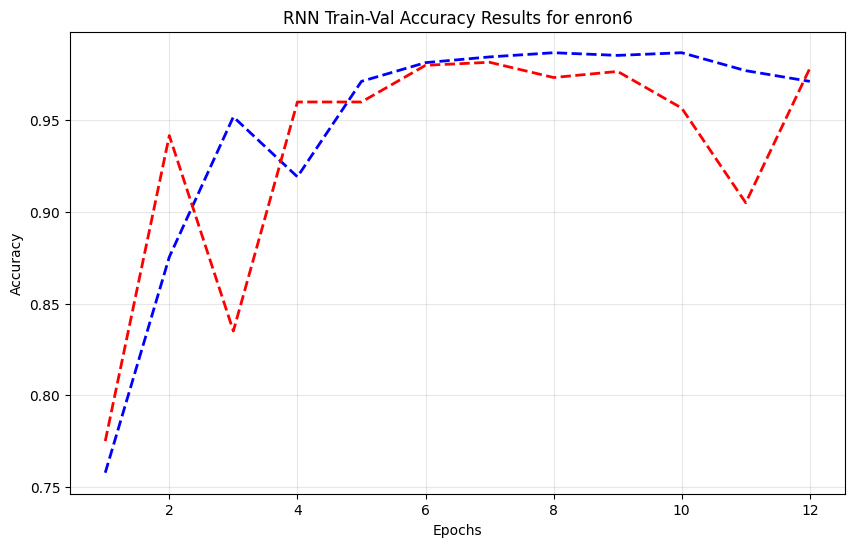

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
Begin ArtificialNNClassifier on enron6
[" key dates and impact of upcoming sap implementation\n over the next few weeks , project apollo and beyond will conduct its final sap\n\nimplementation \x01 ) this implementation will impact approximately 12 , 000 new\n\nusers plus all existing system users . sap brings a new dynamic to enron ,\n\nenhancing the timely flow and sharing of specific project , human resources ,\n\nprocurement , and financial information across business units and across\n\ncontinents .\n\nthis final implementation will retire multiple , disparate systems and replace\n\nthem with a common , integrated system encompassing many processes including\n\npayroll , timekeeping , benefits , project management , and numerous financial\n\nprocesses .\n\nemployees will be empowered to update and / or view their personal information\n\nvia the intranet - based ehronline - - a single front - end to sap ' s self service\n\nfunctionality and e

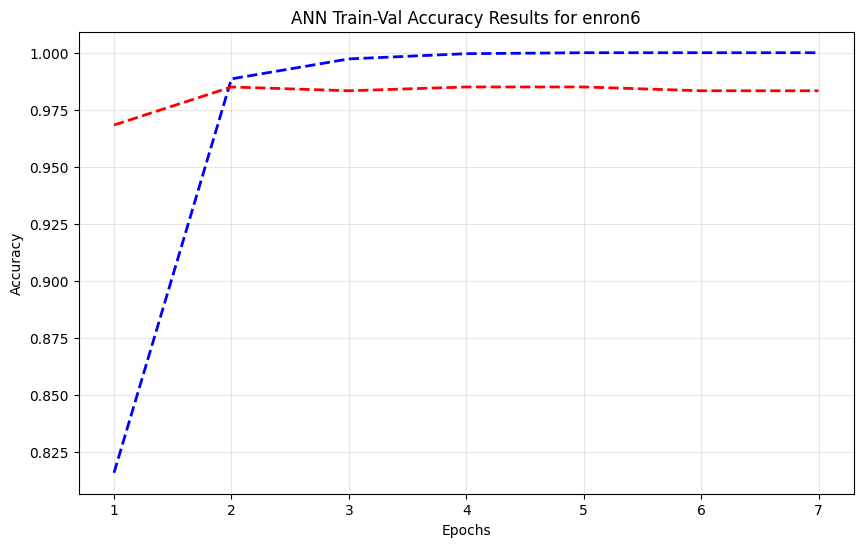

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [10]:
train_and_evaluate_nn_models(enron6_input, enron6["Label"], "enron6")

In [11]:
from traintest import add_to_json_array

print(metric_results)

def convert(dic):
    dic["confusion_matrix"] = dic["confusion_matrix"].tolist()
    return dic

metric_results = list(map(convert, metric_results))

add_to_json_array("./enron_classification_nn_report.json", metric_results, mode="overwrite")

[{'dataset': 'enron1', 'model': 'CNN', 'metrics': {'accuracy': 0.9864864864864865, 'weighted_precision': 0.9865214653825525, 'wighted_recall': 0.9864864864864865, 'weighted_f1': 0.9864995680645459, 'macro_precision': 0.9827437446074202, 'macro_recall': 0.9846166338849089, 'macro_f1': 0.9836739472037245, 'roc_auc': 0.9846166338849089}, 'confusion_matrix': array([[363,   4],
       [  3, 148]], dtype=int64), 'epochs': 7}, {'dataset': 'enron1', 'model': 'RNN', 'metrics': {'accuracy': 0.9864864864864865, 'weighted_precision': 0.9864688601645123, 'wighted_recall': 0.9864864864864865, 'weighted_f1': 0.9864732316559559, 'macro_precision': 0.9845652173913043, 'macro_recall': 0.9826677734269267, 'macro_f1': 0.983610188261351, 'roc_auc': 0.9826677734269267}, 'confusion_matrix': array([[364,   3],
       [  4, 147]], dtype=int64), 'epochs': 12}, {'dataset': 'enron1', 'model': 'ANN', 'metrics': {'accuracy': 0.9903474903474904, 'weighted_precision': 0.9903750431683995, 'wighted_recall': 0.990347490